The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==0.16.1 --quiet

# Image Augmentation
:label:`sec_image_augmentation`


We mentioned that large-scale datasets are prerequisites for the successful
application of deep neural networks in
:numref:`sec_alexnet`. Image augmentation technology expands the scale of training datasets
by making a series of random changes to the training images to produce similar,
but different, training examples. Another way to explain image augmentation is
that randomly changing training examples can reduce a model's dependence on
certain properties, thereby improving its capability for generalization. For
example, we can crop the images in different ways, so that the objects of
interest appear in different positions, reducing the model's dependence on the
position where objects appear. We can also adjust the brightness, color, and
other factors to reduce model's sensitivity to color. It can be said that image
augmentation technology contributed greatly to the success of AlexNet. In this
section, we will discuss this technology, which is widely used in computer
vision.

First, import the packages or modules required for the experiment in this section.


In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torch import nn

## Common Image Augmentation Method

In this experiment, we will use an image with a shape of $400\times 500$ as an example.

We first need to download the image.


In [6]:
! curl "https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/cat1.jpg" 

Now let's visualize the image that we downloaded.

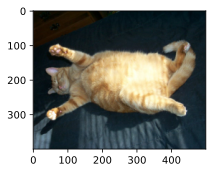

In [7]:
d2l.set_figsize()
img = d2l.Image.open('cat1.jpg')
d2l.plt.imshow(img);

Most image augmentation methods have a certain degree of randomness. To make it easier for us to observe the effect of image augmentation, we next define the auxiliary function `apply`. This function runs the image augmentation method `aug` multiple times on the input image `img` and shows all results.


In [8]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

### Flipping and Cropping

Flipping the image left and right usually does not change the category of the object. This is one of the earliest and most widely used methods of image augmentation. Next, we use the `transforms` module to create the `RandomFlipLeftRight` instance, which introduces a 50% chance that the image is flipped left and right.


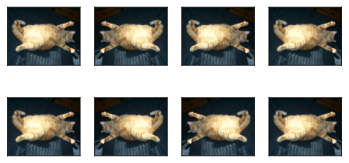

In [9]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

Flipping up and down is not as commonly used as flipping left and right. However, at least for this example image, flipping up and down does not hinder recognition. Next, we create a `RandomFlipTopBottom` instance for a 50% chance of flipping the image up and down.


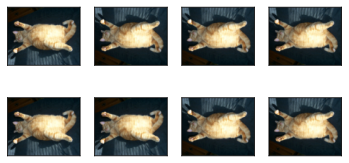

In [10]:
apply(img, torchvision.transforms.RandomVerticalFlip())

In the example image we used, the cat is in the middle of the image, but this
may not be the case for all images. In
:numref:`sec_pooling`,
we explained that the pooling layer can reduce the sensitivity of the
convolutional layer to the target location. In addition, we can make objects
appear at different positions in the image in different proportions by randomly
cropping the image. This can also reduce the sensitivity of the model to the
target position.

In the following code, we randomly crop a region with an area of 10% to 100% of the original area, and the ratio of width to height of the region is randomly selected from between 0.5 and 2. Then, the width and height of the region are both scaled to 200 pixels. Unless otherwise stated, the random number between $a$ and $b$ in this section refers to a continuous value obtained by uniform sampling in the interval $[a, b]$.


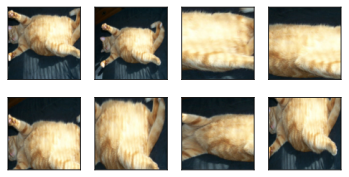

In [11]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

**Exercise 1:** Change the scale parameter so the crop region goes from 1% to 10% of the image. Does it makes sense? Why?

**Exercise 2:** Find the optimal range to crop this image.

### Changing the Color

Another augmentation method is changing colors. We can change four aspects of the image color: brightness, contrast, saturation, and hue. In the example below, we randomly change the brightness of the image to a value between 50% ($1-0.5$) and 150% ($1+0.5$) of the original image.


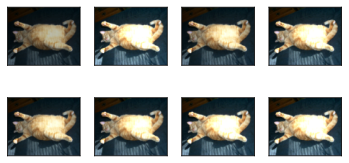

In [12]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

Similarly, we can randomly change the hue of the image.


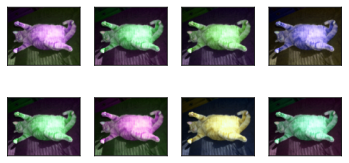

In [13]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

*Ok, have you ever seen a green cat?*

**Exercise 3:** Try different hue ranges and select one that is more realistic for cats.


**Exercice 4:** We can also create a `ColorJitter` instance and set how to randomly change the `brightness`, `contrast`, `saturation`, and `hue` of the image at the same time. Do this in the following code box


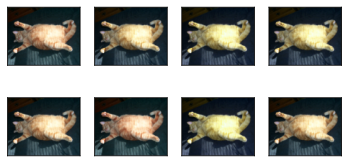

In [19]:
color_aug = torchvision.transforms.ColorJitter(brightness=0, contrast = 0, hue = (-0.05, 0.05))
apply(img, color_aug)

### Overlying Multiple Image Augmentation Methods

In practice, we will overlay multiple image augmentation methods. We can overlay the different image augmentation methods defined above and apply them to each image by using a `Compose` instance.


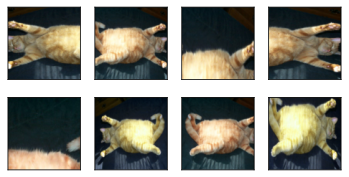

In [20]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)